# 주식에 사용되는 각종 지표를 직접 구현 및 가시화해보자
# talib와 비교하여 보자!
# 참고: 퀀트 전략을 위한 인공지능 트레이딩

# 1. 이동평균선(MA), 들쑥날쑥한 주가의 흐름을 몇일간의 평균적인 값으로 나타내는 지표를 이동평균선이라고 한다.

In [1]:
import pandas as pd
df = pd.read_csv('./SPY.csv')
print(df.head())
print(df.describe())

         Date      Open      High       Low     Close  Adj Close   Volume
0  1993-01-29  43.96875  43.96875  43.75000  43.93750  26.706757  1003200
1  1993-02-01  43.96875  44.25000  43.96875  44.25000  26.896694   480500
2  1993-02-02  44.21875  44.37500  44.12500  44.34375  26.953669   201300
3  1993-02-03  44.40625  44.84375  44.37500  44.81250  27.238594   529400
4  1993-02-04  44.96875  45.09375  44.46875  45.00000  27.352570   531500
              Open         High  ...    Adj Close        Volume
count  6648.000000  6648.000000  ...  6648.000000  6.648000e+03
mean    133.762935   134.541071  ...   110.399391  8.440122e+07
std      59.488006    59.671285  ...    64.113369  9.837713e+07
min      43.343750    43.531250  ...    26.383823  5.200000e+03
25%      96.780937    97.735000  ...    71.256485  6.966775e+06
50%     124.433750   125.335938  ...    93.641503  5.709990e+07
75%     151.702503   152.514999  ...   125.251474  1.229908e+08
max     296.040009   296.309998  ...   294.4

In [17]:
price_df = df.loc[:,['Date','Adj Close']].copy()

print(price_df.head())
print(price_df.tail())
print(len(price_df))
print(price_df.info())

         Date  Adj Close
0  1993-01-29  26.706757
1  1993-02-01  26.896694
2  1993-02-02  26.953669
3  1993-02-03  27.238594
4  1993-02-04  27.352570
            Date   Adj Close
6643  2019-06-18  290.984741
6644  2019-06-19  291.641541
6645  2019-06-20  294.427979
6646  2019-06-21  294.000000
6647  2019-06-24  293.640015
6648
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648 entries, 0 to 6647
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6648 non-null   object 
 1   Adj Close  6648 non-null   float64
dtypes: float64(1), object(1)
memory usage: 104.0+ KB
None


In [19]:
sample = price_df.loc[price_df['Date'] > '2019-01-01']
print(sample.info())
print()

price_df.set_index(['Date'],inplace=True)
sample = price_df.loc[price_df.index > '2019-01-01']
print(sample)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 6528 to 6647
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       120 non-null    object 
 1   Adj Close  120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB
None

             Adj Close
Date                  
2019-01-02  247.877258
2019-01-03  241.962219
2019-01-04  250.066925
2019-01-07  252.038620
2019-01-08  254.406601
...                ...
2019-06-18  290.984741
2019-06-19  291.641541
2019-06-20  294.427979
2019-06-21  294.000000
2019-06-24  293.640015

[120 rows x 1 columns]


In [20]:
# 20일 이동평균선을 그린다.
price_df['center'] = price_df['Adj Close'].rolling(20).mean() # 이동평균선을 구한다.
print(price_df.iloc[18:25])

sample = price_df.loc[price_df.index > '2019-01-01']
print(sample)

            Adj Close     center
Date                            
1993-02-25  26.953669        NaN
1993-02-26  26.991682  26.910942
1993-03-01  26.915695  26.921389
1993-03-02  27.314577  26.942283
1993-03-03  27.428545  26.966027
1993-03-04  27.276592  26.967927
1993-03-05  27.200619  26.960329
             Adj Close      center
Date                              
2019-01-02  247.877258  253.082145
2019-01-03  241.962219  251.424126
2019-01-04  250.066925  250.617074
2019-01-07  252.038620  249.928799
2019-01-08  254.406601  249.667734
...                ...         ...
2019-06-18  290.984741  282.981668
2019-06-19  291.641541  283.307582
2019-06-20  294.427979  283.816605
2019-06-21  294.000000  284.477884
2019-06-24  293.640015  285.089319

[120 rows x 2 columns]


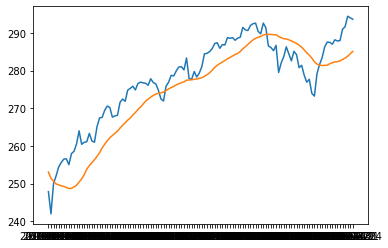

In [21]:
import matplotlib.pyplot as plt
plt.plot(sample.index, sample['Adj Close'], label="Adj Close")
plt.plot(sample.index, sample['center'], label="center")

# ta-lib로 이동평균선을 구해보자!

In [22]:
#Colab에 주식관련 Lib 설치(Ta-Lib)

# (2020) https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 276kB 7.7MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.19-cp37-cp37m-linux_x86_64.whl size=1437987 sha256=6747975983f5fba3728defdf50b95a075f41820e0f4f16ac3fb6cb943a26be90
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3d1ccd06caadd8fa47e016991dd0d27f1163bb260f1854e2ff
Successfully built ta-lib


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


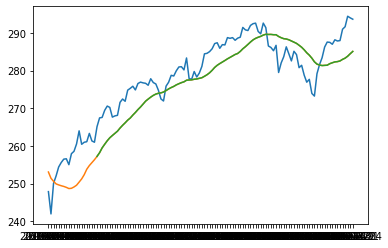

In [23]:
#RA(이동평균션) : Standard deviation rolling average
# Moving Average
sample['MA20'] = talib.SMA(sample['Adj Close'],timeperiod=20)

import matplotlib.pyplot as plt
plt.plot(sample.index, sample['Adj Close'], label="Adj Close")
plt.plot(sample.index, sample['center'], label="center")
plt.plot(sample.index, sample['MA20'], label="MA20")

In [25]:
sample['MA10'] = talib.SMA(sample['Adj Close'],timeperiod=10)
sample['MA5'] = talib.SMA(sample['Adj Close'],timeperiod=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


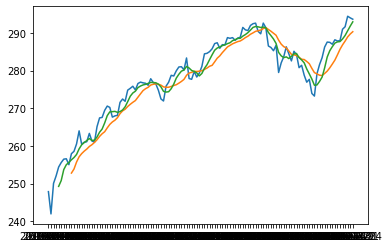

In [27]:
import matplotlib.pyplot as plt
plt.plot(sample.index, sample['Adj Close'], label="Adj Close")
plt.plot(sample.index, sample['MA10'], label="MA10")
plt.plot(sample.index, sample['MA5'], label="MA5")